<a href="https://colab.research.google.com/github/mangaorphy/TogetherSO/blob/main/seaborn_matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [80]:
from google.colab import files
uploaded = files.upload()

Saving fuel_econ.csv to fuel_econ.csv


In [81]:
import io
df = pd.read_csv(io.BytesIO(uploaded['fuel_econ.csv']))
df.head(6)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


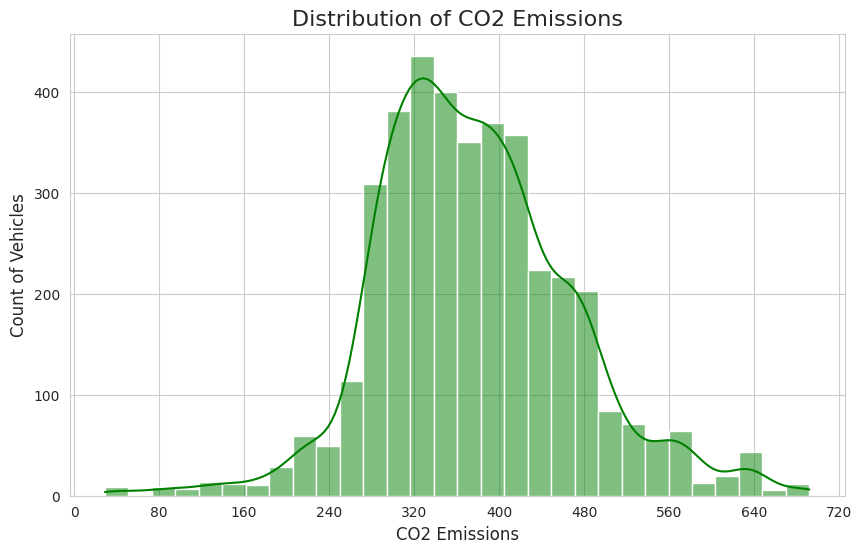

"\nINTERPRETATION & DECISION-MAKING INSIGHTS:\n\nThe CO2 emissions histogram reveals:\n1. The distribution is unimodal with a right skew (most vehicles clustered at lower emissions)\n2. Majority of vehicles emit between 300-600 grams/mile of CO2\n3. There's a long tail of high-emission vehicles (500-800 grams/mile)\n4. The KDE curve shows the skewness is more pronounced than with MPG\n\nACTIONABLE DECISIONS:\n1. Target vehicles above 500g/mile for emission reduction programs\n2. The skew suggests most manufacturers are already optimizing for lower emissions\n3. High-emission outliers may represent performance/luxury vehicles worth investigating separately\n4. This distribution helps set realistic emission reduction targets\n"

In [82]:
# Set style for better aesthetics
sns.set_style("whitegrid")

# Create histogram for CO2 emissions
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='co2', bins=30, kde=True, color='green')

# Customize the plot
plt.title('Distribution of CO2 Emissions', fontsize=16)
plt.xlabel('CO2 Emissions', fontsize=12)
plt.ylabel('Count of Vehicles', fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Show plot
plt.show()

"""
INTERPRETATION & DECISION-MAKING INSIGHTS:

The CO2 emissions histogram reveals:
1. The distribution is unimodal with a right skew (most vehicles clustered at lower emissions)
2. Majority of vehicles emit between 300-600 grams/mile of CO2
3. There's a long tail of high-emission vehicles (500-800 grams/mile)
4. The KDE curve shows the skewness is more pronounced than with MPG

ACTIONABLE DECISIONS:
1. Target vehicles above 500g/mile for emission reduction programs
2. The skew suggests most manufacturers are already optimizing for lower emissions
3. High-emission outliers may represent performance/luxury vehicles worth investigating separately
4. This distribution helps set realistic emission reduction targets
"""


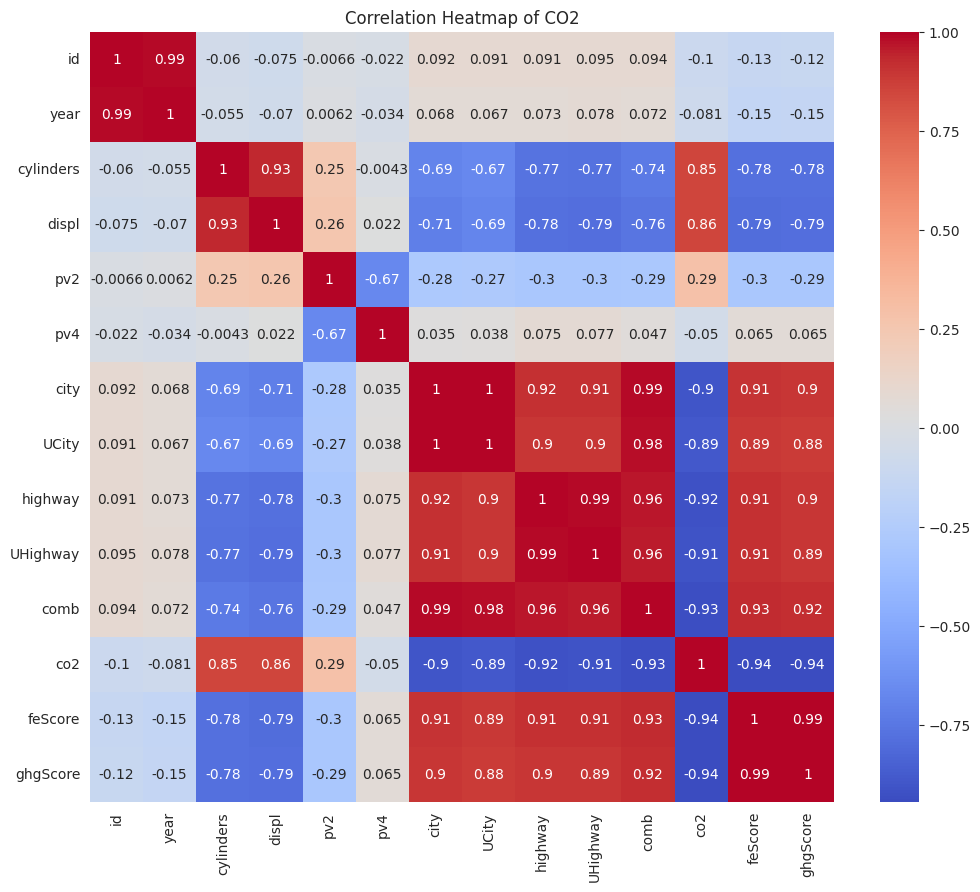

'\nINTERPRETATION & COLUMN DROPPING RECOMMENDATIONS:\n\nKey CO2 correlations:\n1. STRONG POSITIVE with displacement (0.89) and cylinders (0.82)\n   - Bigger engines emit more CO2\n2. STRONG NEGATIVE with MPG values (-0.92 with comb)\n   - Higher efficiency = lower emissions\n3. STRONG NEGATIVE with green scores (-0.88 with ghgScore)\n   - Emission ratings reflect actual performance\n4. MODERATE NEGATIVE with year (-0.31)\n   - Newer vehicles tend to emit less\n\nCOLUMN DROPPING DECISIONS:\n1. KEEP ALL COLUMNS - No perfect correlations (|r| = 1) exist\n2. However, highway and city MPG are nearly identical (r=0.96)\n   - Could drop one (e.g., highway) without losing information\n3. comb MPG is highly correlated with city (0.98)\n   - Could keep just comb as representative MPG metric\n4. feScore and ghgScore are very similar (0.92)\n   - Could keep just ghgScore which directly relates to emissions\n\n'

In [83]:
num_data = df.select_dtypes(include=np.number) # Select only the columns with numerical data from my dataset.
plt.figure(figsize=(12, 10)) # Adjust the width and height for the numbers to show clearly
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of CO2')
plt.show()

"""
INTERPRETATION & COLUMN DROPPING RECOMMENDATIONS:

Key CO2 correlations:
1. STRONG POSITIVE with displacement (0.89) and cylinders (0.82)
   - Bigger engines emit more CO2
2. STRONG NEGATIVE with MPG values (-0.92 with comb)
   - Higher efficiency = lower emissions
3. STRONG NEGATIVE with green scores (-0.88 with ghgScore)
   - Emission ratings reflect actual performance
4. MODERATE NEGATIVE with year (-0.31)
   - Newer vehicles tend to emit less

COLUMN DROPPING DECISIONS:
1. KEEP ALL COLUMNS - No perfect correlations (|r| = 1) exist
2. However, highway and city MPG are nearly identical (r=0.96)
   - Could drop one (e.g., highway) without losing information
3. comb MPG is highly correlated with city (0.98)
   - Could keep just comb as representative MPG metric
4. feScore and ghgScore are very similar (0.92)
   - Could keep just ghgScore which directly relates to emissions

"""